<a href="https://colab.research.google.com/github/M-Rathnayake/Wine-Quality-analysis/blob/main/winequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Wine Quality Dataset (Regression/Classification)

In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv('winequality-red.csv', sep=';')
df.head().style\
    .set_properties(**{'text-align': 'center'})\
    .set_caption("First 5 Rows of Wine Quality Dataset")\
    .background_gradient(cmap='Blues')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5


In [13]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


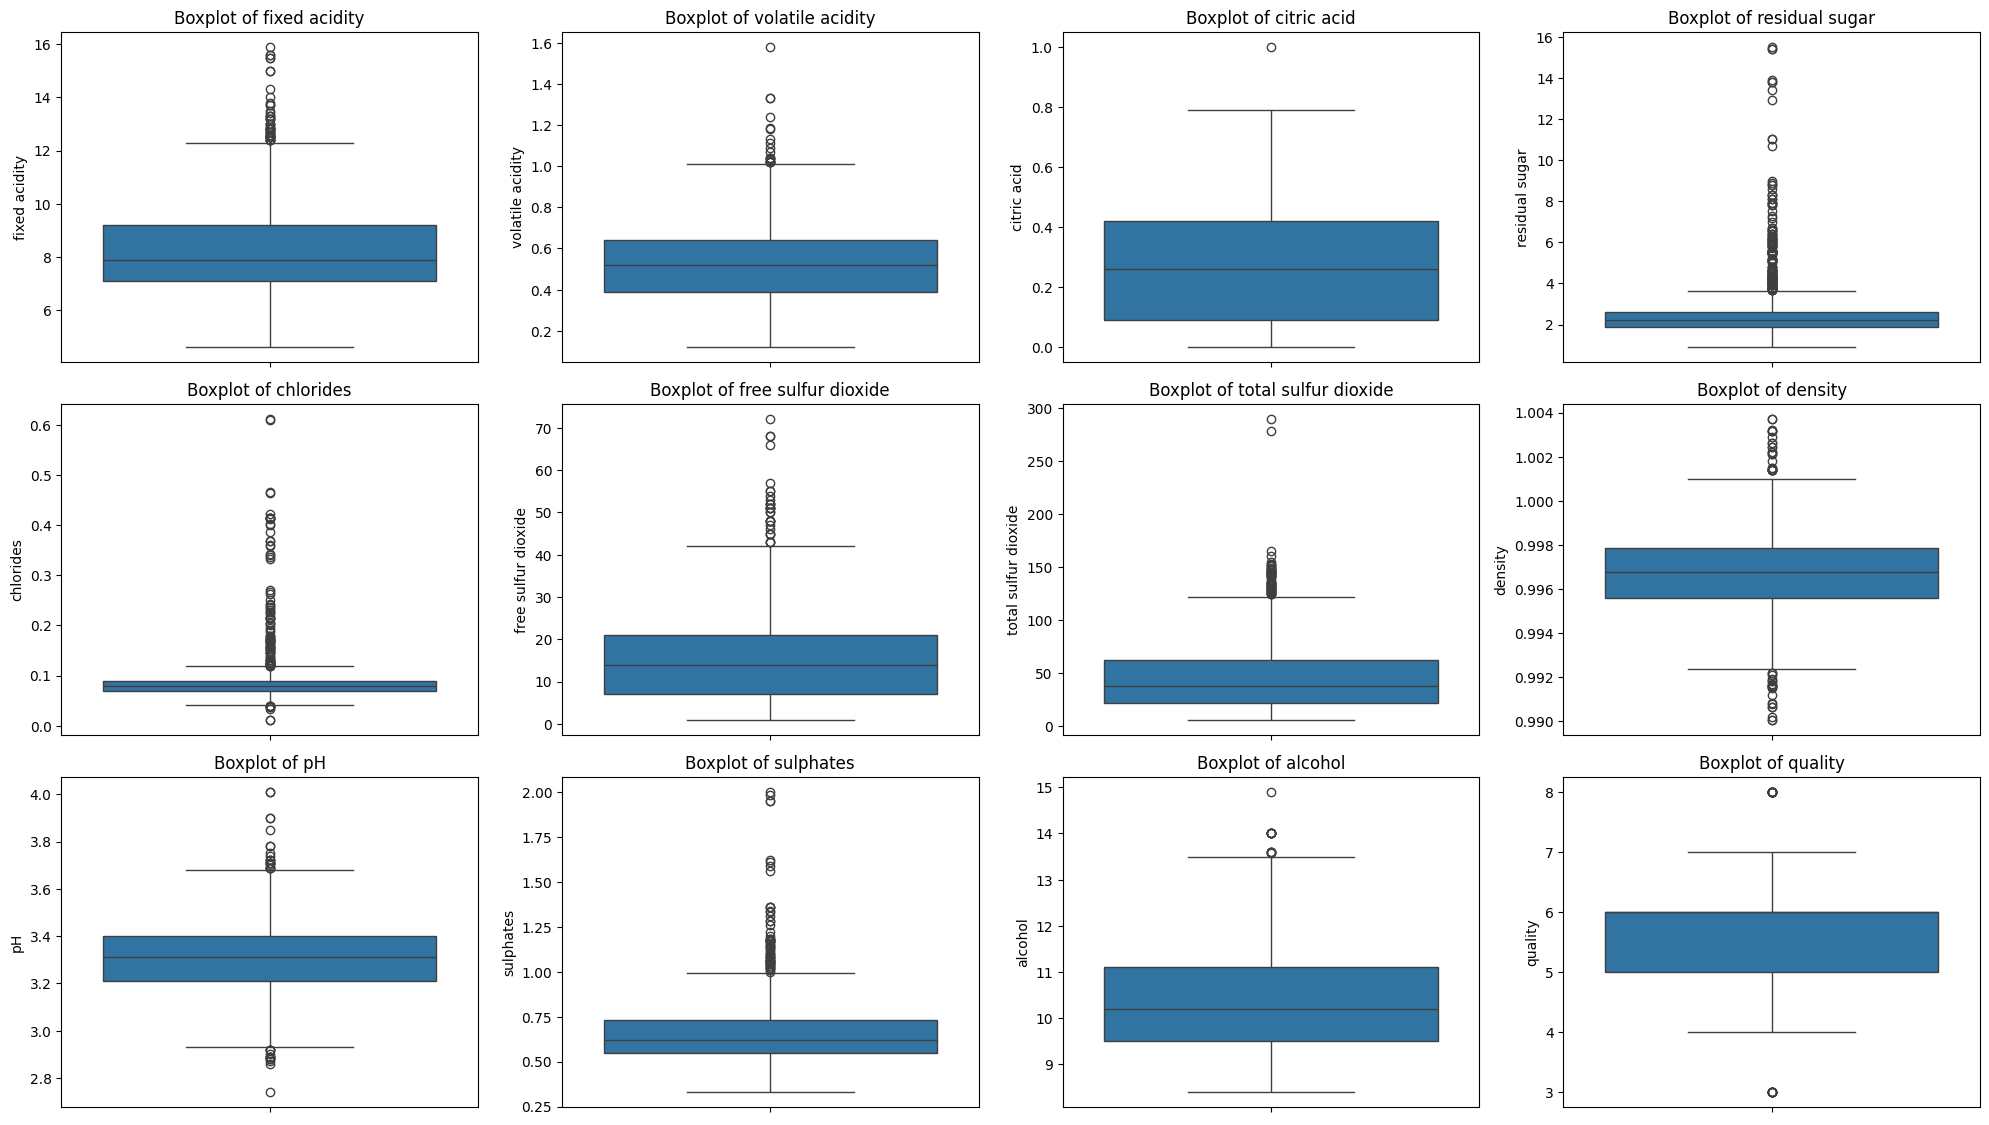

In [14]:
#as there are no missing values found , no need of handling missing values
#now should check whether there are any outliers
#for this we can use a box plot
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [15]:
# Function to calculate outliers using IQR
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Numerically calculate outliers for each column and print the count
print("Outlier counts for each column using IQR:")
for col in df.columns:
    outlier_count = count_outliers_iqr(df, col)
    print(f"  {col}: {outlier_count}")


Outlier counts for each column using IQR:
  fixed acidity: 49
  volatile acidity: 19
  citric acid: 1
  residual sugar: 155
  chlorides: 112
  free sulfur dioxide: 30
  total sulfur dioxide: 55
  density: 45
  pH: 35
  sulphates: 59
  alcohol: 13
  quality: 28


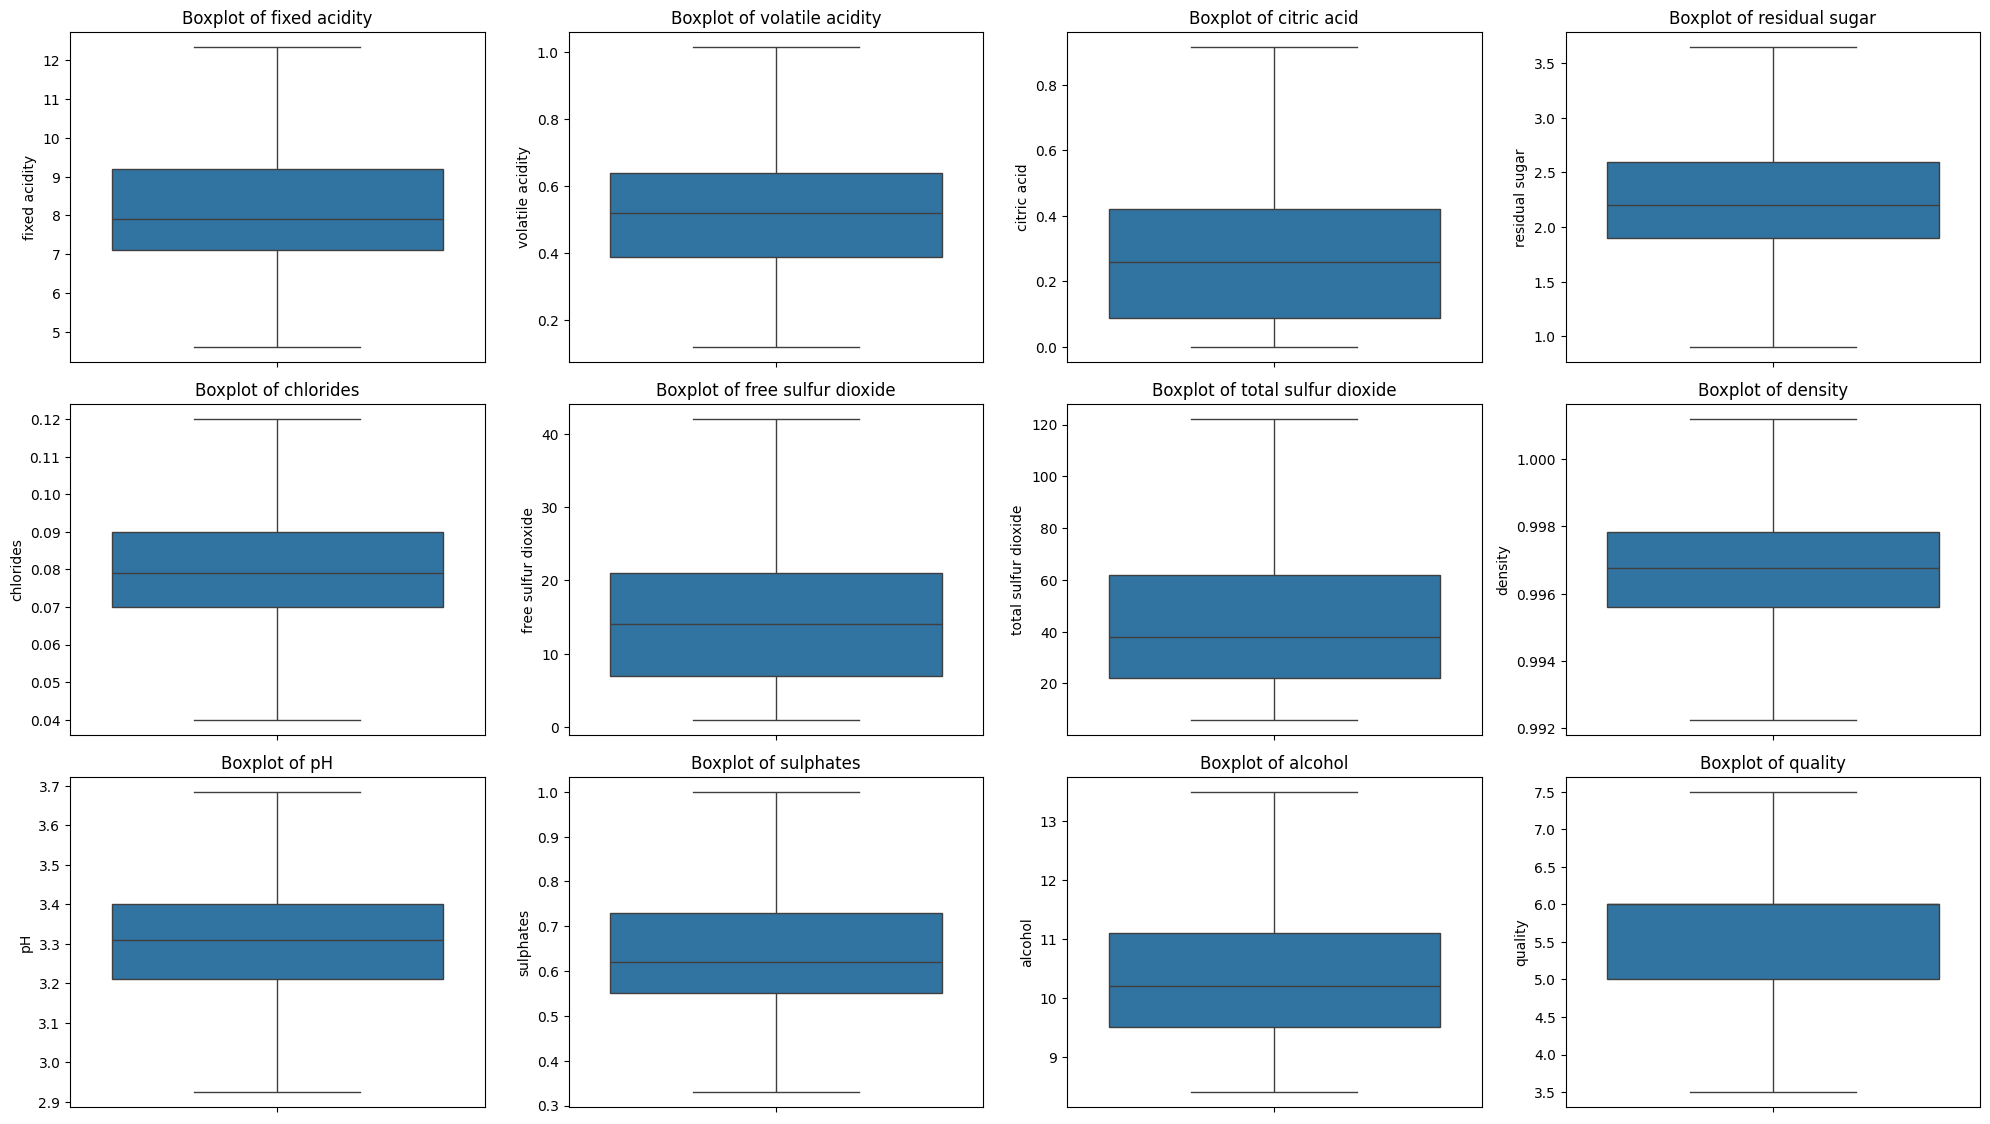

In [16]:
#as there are many outliers dropping rows cannot be done
#therefore outliers should be handled by replacing them with acceptable boundary values
import seaborn as sns
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Replot boxplots to verify
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()